In this project, we load a dataset from hotel booking system, and we try to gain insights on trends like where the guests are from, what is the target market and understanding general statistical trends to gain more understanding on data

-- elaborating more on the features of the dataset, 

lead_time - time between the time of booking and the actual check-in date

total_of_special_requests- special requests made from a single booking

adr - average revenue earned for each room given for a certain period of time 

is_canceled - reports bookings as canceled(1) or not canceled(0)-- (categorical)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hotel_df = pd.read_csv('hotel_bookings.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
hotel_df.shape

(119390, 32)

In [231]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

There are two types of hotels addressed in the hotel feature, 'Resort hotel' and 'City hotel'.
Let us examine if they have any significant insights to show us. 

# data cleaning: 

In [15]:
# let us first try to find if there are any missing values in total

hotel_df.isnull().values.any()

True

In [16]:
# to see the null values corresponding to fields

hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

It is crucial to consider what to do with the null values depends on the reasons why an attribute would be having null values in the first place. And if it conflicts with the outcome we are expecting to conclude. 

--> Here, the agent and company with highest number of null values are most likely null, if the booking was done without either agent or company ( a private one) 

--> we shall fill all null values with 0's 

In [17]:
hotel_df.fillna(0, inplace = True)

In [19]:
# checking if the null values are filled corectly
hotel_df.isnull().values.any()

False

# now let us consider the features or instances of features that are mostly likely to be irrelavant

if any instances of adults, children and babies are of values 0 , then the booking does not make sense while no one is likely to stay or it could be a false booking. Next up, we try to free those instances. 

In [25]:
no_guests = (hotel_df['adults']==0) & (hotel_df['children']==0) & (hotel_df['babies']==0)

In [26]:
no_guests

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [29]:
# let's apply the filter no_guests to obtain the rows where there are no guests 

hotel_df[no_guests]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


shows 180 values are provided with no 0 values for all three columns.. 
Now, we shall drop them
-> One way to do so, it to take the negation of the created variable no_guests

In [31]:
Hotel_df1 = hotel_df[~no_guests]

In [33]:
Hotel_df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


# checking for duplicate values: 

In [35]:
Hotel_df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119210, dtype: bool

In [36]:
Hotel_df1.duplicated().sum()

31980

In [146]:
data_hotel = Hotel_df1.drop_duplicates()
data_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [40]:
print(data_hotel.duplicated())
print(data_hotel.shape)

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 87230, dtype: bool
(87230, 32)


# descriptive analysis: 


-->  Descriptive analysis is using the historical data and giving insights on general trends and observations. 
--> Here , we describe the data in form of five point summary which gives us the minimum, 25th percentile, medien, 75th percentile and maximum values of specific numerical features. 

In [49]:
data_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [50]:
data_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

In [51]:
data_hotel[['lead_time','total_of_special_requests','adr']].describe()

,lead_time,total_of_special_requests,adr
count,87230.000000,87230.000000,87230.000000
mean,79.971019,0.698934,106.518031
std,86.058683,0.832051,54.891227
min,0.000000,0.000000,-6.380000
25%,11.000000,0.000000,72.250000
50%,49.000000,0.000000,98.200000
75%,125.000000,1.000000,134.100000
max,737.000000,5.000000,5400.000000


# removing outliers:

--> for the cosidered there features, let us now try to sort the data for the extreme outliers. for the above 10 percentile values we get the output by using following code and quantile() function from numpy


In [58]:
for col in ['lead_time','total_of_special_requests','adr']:
    print('feature name: {}'.format(col))
    
    for i in range(90,101,1):
        quantile_value = np.quantile(data_hotel[col], q = i/100)
        print('{}the quantile value is {}'. format(i,quantile_value))
    print('\n')

feature name: lead_time
90the quantile value is 204.0
91the quantile value is 212.0
92the quantile value is 220.0
93the quantile value is 230.0
94the quantile value is 241.0
95the quantile value is 256.0
96the quantile value is 272.0
97the quantile value is 291.0
98the quantile value is 315.0
99the quantile value is 347.0
100the quantile value is 737.0


feature name: total_of_special_requests
90the quantile value is 2.0
91the quantile value is 2.0
92the quantile value is 2.0
93the quantile value is 2.0
94the quantile value is 2.0
95the quantile value is 2.0
96the quantile value is 2.0
97the quantile value is 3.0
98the quantile value is 3.0
99the quantile value is 3.0
100the quantile value is 5.0


feature name: adr
90the quantile value is 174.0
91the quantile value is 179.0
92the quantile value is 185.0
93the quantile value is 190.0
94the quantile value is 197.1
95the quantile value is 204.13300000000018
96the quantile value is 213.0
97the quantile value is 225.0
98the quantile value 

the 100th quartile of all three features are far from mean value of the specific features. 
and for the lower limit let us consider the bottom 10 percentiles( 1 to 10)

In [64]:
for col in ['lead_time','total_of_special_requests','adr']:
    print('feature name: {}'.format(col))
    
    for i in range(1,11,1):
        quantile_value = np.quantile(data_hotel[col], q = i/100)
        print('{}the quantile value is {}'. format(i,quantile_value))
    print('\n')

feature name: lead_time
1the quantile value is 0.0
2the quantile value is 0.0
3the quantile value is 0.0
4the quantile value is 0.0
5the quantile value is 0.0
6the quantile value is 0.0
7the quantile value is 1.0
8the quantile value is 1.0
9the quantile value is 1.0
10the quantile value is 1.0


feature name: total_of_special_requests
1the quantile value is 0.0
2the quantile value is 0.0
3the quantile value is 0.0
4the quantile value is 0.0
5the quantile value is 0.0
6the quantile value is 0.0
7the quantile value is 0.0
8the quantile value is 0.0
9the quantile value is 0.0
10the quantile value is 0.0


feature name: adr
1the quantile value is 0.0
2the quantile value is 6.0
3the quantile value is 29.0
4the quantile value is 34.8516
5the quantile value is 37.0
6the quantile value is 39.15
7the quantile value is 42.0
8the quantile value is 44.0
9the quantile value is 46.5
10the quantile value is 48.0




# exploring where the guests are from using spatial analysis

Knowing where the customers are from or in other words where more revenue is generated from helps a business in understanding the target market 

To tackle market place, we shall consider only the bookings that are not canceled. 

In [77]:
not_canceled = data_hotel[data_hotel['is_canceled']==0]
not_canceled.shape

(63221, 32)

In [81]:
# Getting the total bookings according to countries - country booking data

country_bdata = not_canceled['country'].value_counts()
country_bdata

PRT    17573
GBR     8440
FRA     7091
ESP     5382
DEU     4332
       ...  
ZMB        1
SYC        1
MDG        1
SMR        1
FRO        1
Name: country, Length: 166, dtype: int64

In [87]:
# let us first set an index to our data frame

country_bdata = not_canceled['country'].value_counts().reset_index()
country_bdata

,index,country
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [88]:
country_bdata.columns = ['country', 'Num of bookings']
country_bdata

,country,Num of bookings
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


we use plotly library to use a 

In [89]:
!pip install chart-studio
# chart studio provides a web service to host our graph

In [90]:
!pip install plotly

In [92]:
import chart_studio.plotly as py
import plotly.graph_objs as go  # to plot graphs and plots in plotly
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# plot and iplot are used to show the plot in current jupyer notebook

init_notebook_mode(connected = True)

In [96]:
country_map = px.choropleth(data_frame = country_bdata,
              locations = country_bdata['country'],
              color = country_bdata['Num of bookings'],
              hover_name = country_bdata['country'],
              title = 'Home country of guests')

In [97]:
country_map.show()

From the above spatial chart, we observe that high number of guests come from PRT, followed by GBR, FRA and ESP. The least nubmer of guests come from multiple countries such as MLI,MRT,MDG and so on. 

# analysing the possible differnece between assigned and reserved room types:

We shall analyse how many bookings are made for a particular room type and the possibility of the bookings getting their desired room types reserved. 

In [103]:
data_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [102]:
data_hotel[['assigned_room_type','reserved_room_type']]

,assigned_room_type,reserved_room_type
0,C,C
1,C,C
2,C,A
3,A,A
4,A,A
...,...,...
119385,A,A
119386,E,E
119387,D,D
119388,A,A


In [106]:
pivot_room_types = pd.crosstab(index = data_hotel['reserved_room_type'], columns = data_hotel['assigned_room_type']\
                              ,margins = True)
pivot_room_types


assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,All
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


The above pivot table shows the total of reserved room types by the customers on the columns and the type of rooms finally reserved on the system. Let us normalize the above pivot table to get the percentages of the same for an effective understanding of ratios. 

In [108]:
normalize_pivot= pd.crosstab(index = data_hotel['reserved_room_type'], columns = data_hotel['assigned_room_type'],\
            margins = True, normalize = 'index').round(2) * 100

normalize_pivot


assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


By observing the diagonal values of the above pivot, we can conclude that there indeed is a difference between the room types that were initially reserved and finally assigned. Not all reserved bookings could get their desired rooms. 

Now we try to analyse

# market segments with highest bookings?


In [110]:
data_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [111]:
data_hotel[['market_segment','distribution_channel','agent','company']]

,market_segment,distribution_channel,agent,company
0,Direct,Direct,0.0,0.0
1,Direct,Direct,0.0,0.0
2,Direct,Direct,0.0,0.0
3,Corporate,Corporate,304.0,0.0
4,Online TA,TA/TO,240.0,0.0
...,...,...,...,...
119385,Offline TA/TO,TA/TO,394.0,0.0
119386,Online TA,TA/TO,9.0,0.0
119387,Online TA,TA/TO,9.0,0.0
119388,Online TA,TA/TO,89.0,0.0


In [112]:
data_hotel['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [114]:
data_hotel['market_segment'].value_counts()

Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: market_segment, dtype: int64

since we are trying to represent the market segment feature as a fractional part of whole data, we use pie chart for efficient understanding

In [117]:
data_hotel['market_segment'].value_counts().index

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'],
      dtype='object')

In [118]:
data_hotel['market_segment'].value_counts().values

array([51553, 13855, 11780,  4922,  4200,   692,   226,     2])

In [120]:
market_segment_chart = px.pie(data_hotel,
                            values = data_hotel['market_segment'].value_counts().values,
                            names = data_hotel['market_segment'].value_counts().index)

In [121]:
market_segment_chart

From the above pie chart, it is clear that the majority of bookings(59%) have been done through online travel agents, followed by offline TA (15.9%) and 13.5% bookings have been done directly 

# Analyzing the average price per night(ADR) of various room types corresponding to different market segments :

We use a barplot to visualize the ADR corresponding to market segments. 

In [123]:
data_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<AxesSubplot: xlabel='market_segment', ylabel='adr'>

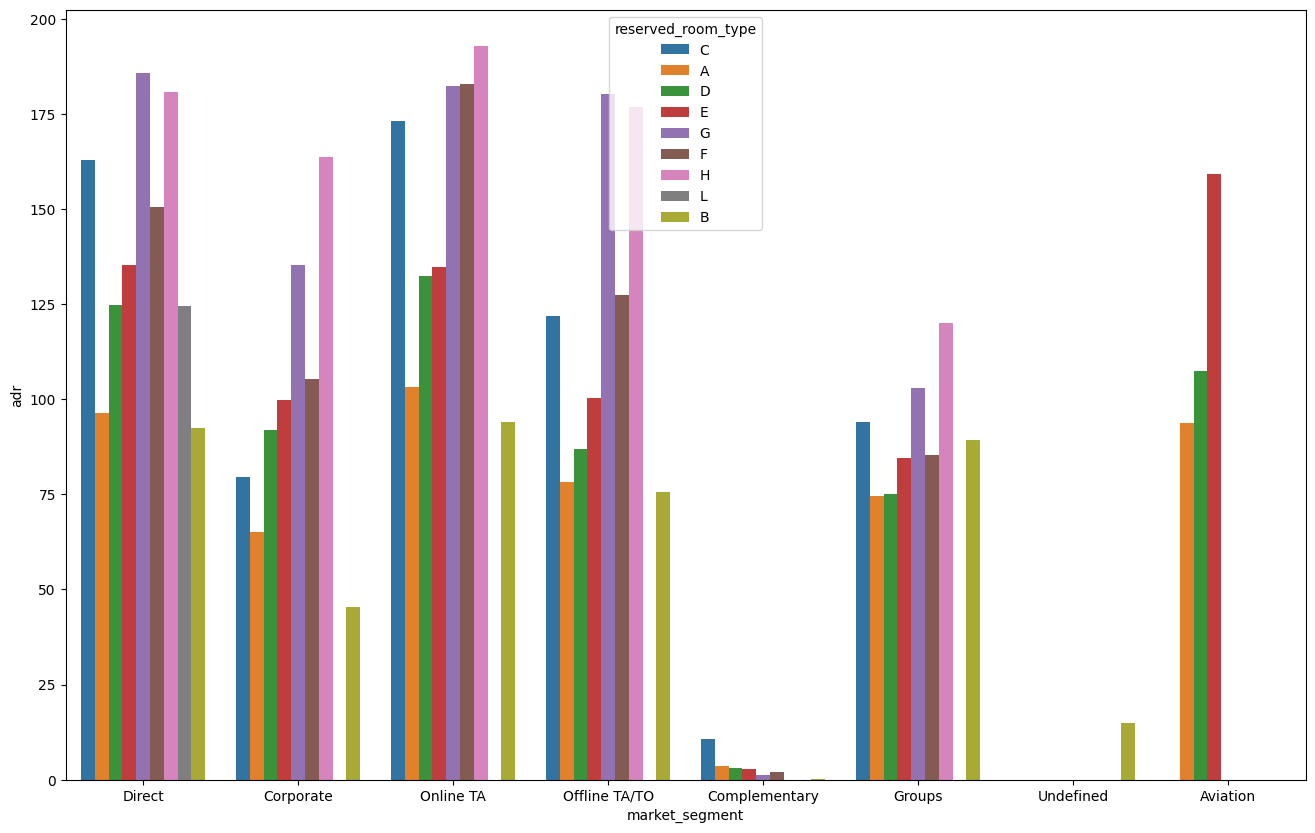

In [131]:
# using seaborn to obtain barplot
plt.figure(figsize = (16,10))
sns.barplot(data = data_hotel, x = 'market_segment', y = 'adr', hue = 'reserved_room_type', ci = None)

# the estimator parameter of the barplot function takes the mean of adr as default, this could be changed in later 
# as per problem statement requirments

We can notice that for the most market segments, room types of C, G, F, H are observed to be having a generally higher ADR 

# analysing arrival of guests on each day: 

let us examine the total number of guests on each day and shall plot it using a line plot 
--> For this part, we need the data in the form of datetime dtype, but as per given data, we have different columns for day, week, and month. Foremost, we try to group it to a date format

In [132]:
data_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [135]:
data_hotel['arrival_date_month']

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 87230, dtype: object

we shall interchange the name of month with its number

In [136]:
data_hotel['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [137]:
dict_month = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,\
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

In [139]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [148]:
data_hotel['arrival_date_month_num'] = data_hotel['arrival_date_month'].map(dict_month)

In [149]:
data_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_num'],
      dtype='object')

In [150]:
data_hotel[['arrival_date_year','arrival_date_month_num','arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month_num,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [151]:
data_hotel['arrival_date'] = data_hotel['arrival_date_year'].astype(str) + "-" + \
                             data_hotel['arrival_date_month_num'].astype(str)+ '-' +\
                             data_hotel['arrival_date_day_of_month'].astype(str)

In [152]:
data_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_num', 'arrival_date'],
      dtype='object')

In [154]:
data_hotel.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1


In [ ]:
# making a summation of total guests using the data from adults, childdren, babies features 

In [156]:
data_hotel[['adults','children','babies']]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [157]:
data_hotel['Total_guests'] = data_hotel['adults'] + data_hotel['children'] + data_hotel['babies']
data_hotel['Total_guests']

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: Total_guests, Length: 87230, dtype: float64

In [159]:
data_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_num', 'arrival_date', 'Total_guests'],
      dtype='object')

In [160]:
data_hotel[['arrival_date','Total_guests']]

,arrival_date,Total_guests
0,2015-7-1,2.0
1,2015-7-1,2.0
2,2015-7-1,1.0
3,2015-7-1,1.0
4,2015-7-1,2.0
...,...,...
119385,2017-8-30,2.0
119386,2017-8-31,3.0
119387,2017-8-31,2.0
119388,2017-8-31,2.0


In [163]:
data_hotel.groupby(['arrival_date'])['Total_guests'].sum()

arrival_date
2015-10-1     171.0
2015-10-10    210.0
2015-10-11    144.0
2015-10-12    235.0
2015-10-13    128.0
              ...  
2017-8-5      342.0
2017-8-6      322.0
2017-8-7      455.0
2017-8-8      284.0
2017-8-9      287.0
Name: Total_guests, Length: 793, dtype: float64

In [168]:
# we just take the rows of data where the bookings are not canceled

data_notcanceled = data_hotel[data_hotel['is_canceled']==0]
data_notcanceled.shape

(63221, 35)

In [172]:
Total_guests_arrived = data_notcanceled.groupby(['arrival_date'])['Total_guests'].sum()
Total_guests_arrived

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: Total_guests, Length: 793, dtype: float64

<AxesSubplot: xlabel='arrival_date'>

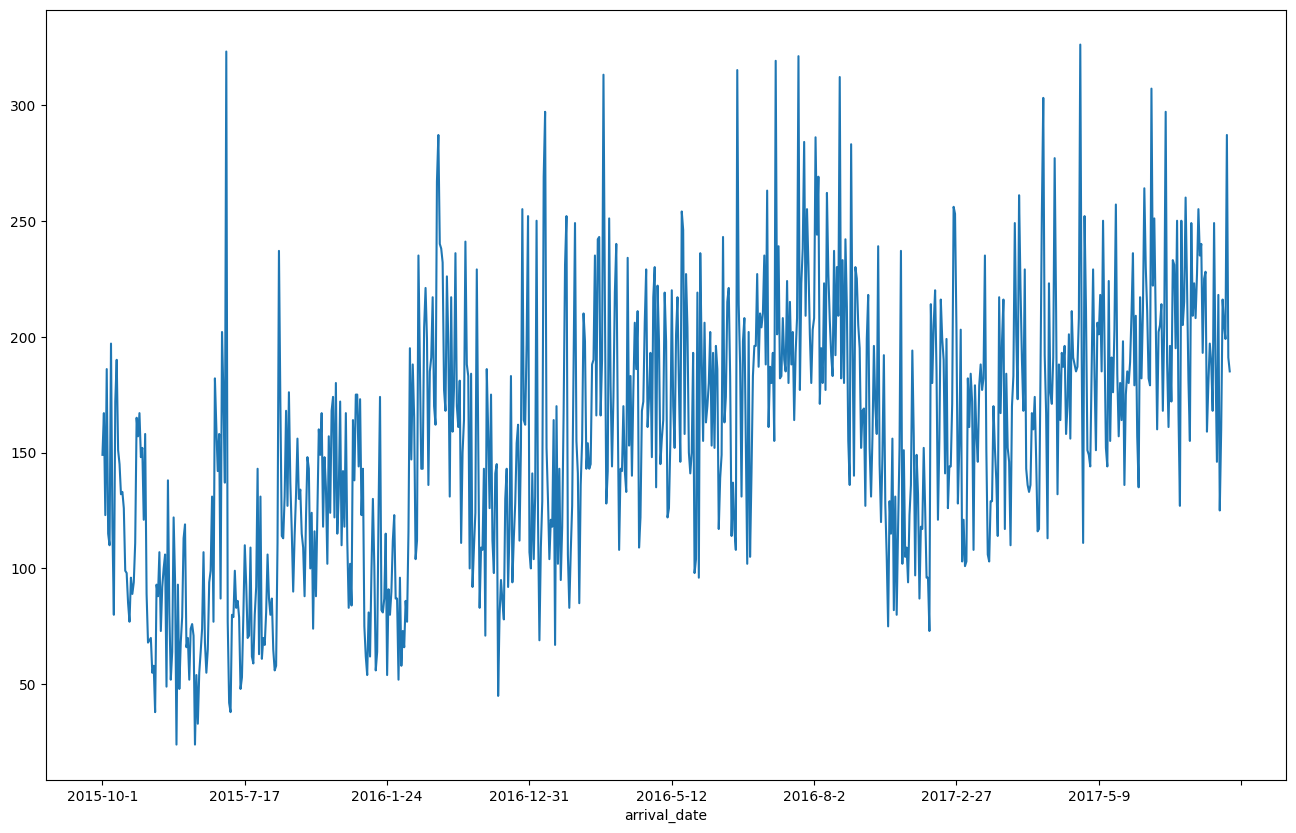

In [175]:
plt.figure(figsize = (16,10))
Total_guests_arrived.plot()

From the above plot, we conclude that there is no general trend is observed. 

# analysing distribution of guest arrival : 

--> To see how the values of an column are distributed or dispersed

In [199]:
type(Total_guests_arrived)

pandas.core.series.Series

In [202]:
# to get the array representation of sereis: 
Total_guests_arrived.values

array([149., 167., 123., 186., 115., 110., 197., 118.,  80., 172., 190.,
       151., 145., 132., 133., 126.,  99.,  98.,  85.,  77.,  96.,  89.,
        94., 111., 165., 157., 167., 148., 152., 121., 158.,  89.,  68.,
        69.,  70.,  55.,  58.,  38.,  93.,  88., 107.,  73.,  92., 100.,
       106.,  49., 138.,  81.,  52.,  64., 122.,  95.,  24.,  93.,  48.,
        68.,  79., 113., 119.,  66.,  70.,  52.,  74.,  76.,  71.,  24.,
        54.,  33.,  55.,  64.,  74., 107.,  68.,  55.,  65.,  94.,  99.,
       131.,  77., 182., 161., 142., 158.,  87., 202., 174., 137., 323.,
        77.,  42.,  38.,  80.,  79.,  99.,  83.,  86.,  79.,  48.,  53.,
        80., 110.,  93.,  70.,  71., 109.,  62.,  59.,  80.,  92., 143.,
        63., 131.,  61.,  70.,  67.,  81., 106.,  87.,  80.,  87.,  65.,
        56.,  58., 111., 237., 171., 114., 113., 131., 168., 127., 176.,
       137., 116.,  90., 114., 132., 156., 130., 134., 115., 109.,  88.,
       122., 148., 143., 100., 124.,  74., 116.,  8

<AxesSubplot: >

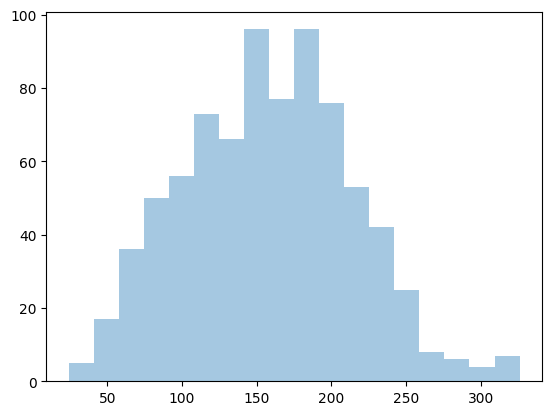

In [220]:
sns.distplot(Total_guests_arrived.values, kde = False)

--> Here we check for distribution of data, and what we obtained looks like a normalized data. A normalized data is one where the data is symmetrically distributed. In other words, the mean of the data is equal to the median of the data. ( A bell shaped curve)

To get just a kde(kernal density plot, we opt for hist parameter to be false and kde parameter to be true)
density plot tells us how many data points are actually availabe at specific point- what is the probability that
our data has a specific value

<AxesSubplot: >

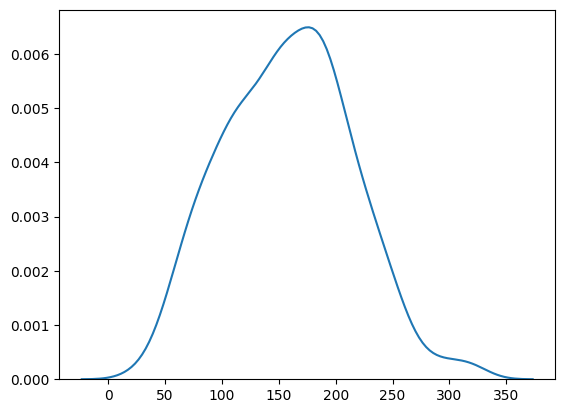

In [216]:
sns.distplot(Total_guests_arrived.values, hist = False, kde = True)

In [222]:
# let's see for mean and medien values of guest arrival 

In [223]:
np.mean(Total_guests_arrived.values)

157.92559899117276

In [225]:
np.median(Total_guests_arrived.values)

158.0

From the mean and median values, since they are statistically equal, we can confirm that the column data follows normal distribution

In [226]:
# checking for standard deviation of the guest arrival data
np.std(Total_guests_arrived.values)

56.48263702610786

# Resort hotel vs City hotel

# prices of rooms per night according to room type

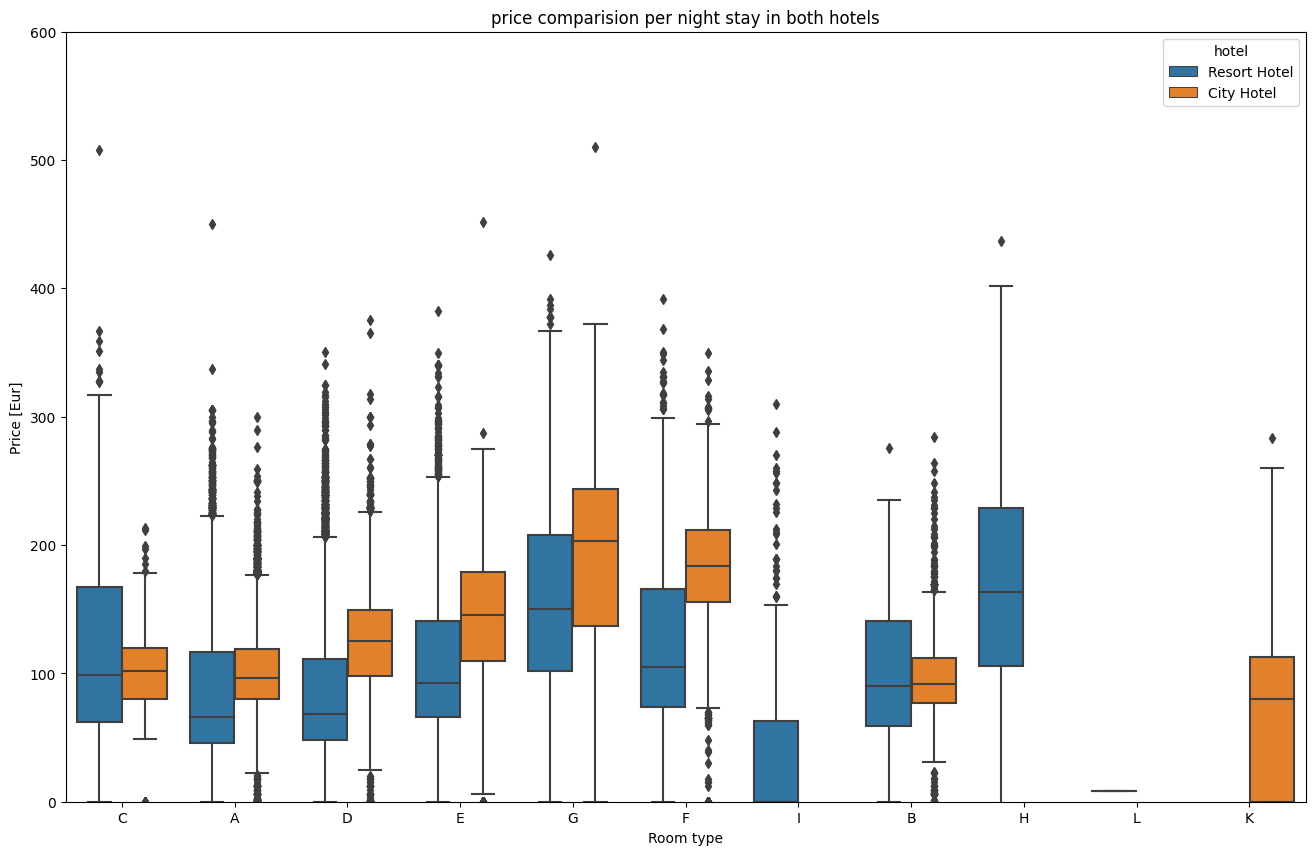

In [234]:
plt.figure(figsize = (16,10))
sns.boxplot(data = data_hotel, x = 'assigned_room_type', y = 'adr', hue = 'hotel')
plt.title("price comparision per night stay in both hotels")
plt.xlabel('Room type')
plt.ylabel('Price [Eur]')
plt.ylim(0,600)
plt.show()

The above plot shows the average price per room depending on the type. The rooms G,C, and H were found to be on the higher end. We could also see that a few rooms, are present either in city hotel or in resort hotel and L is in neither of them. That could be useful to remove the unncecessary data from our dataset. 

In [241]:
data_hotel.drop(data_hotel[data_hotel['assigned_room_type'] == 'L'].index, inplace = True, axis = 0)

In [242]:
data_hotel.shape

(87229, 35)

We notice that there is just one entry on the value "L", however let's drop it. This is further useful in EDA processes where we have more unnecessary data. 


# Analyzing price distribution over the year: 

Every business, especially hospitality and tourism have their own peak season during different times of the year .
Let us see if the prices vary over the year. 

-->We already filtered the not canceled bookings from given data set as 'not_canceled'. We shall use this data to 
observe the price distribution
- It is also important to know if the price differs for city hotel and resort hotel. so, we seperate the data in two different dataframes and later merge into one dataframe and then plot the chart using line plot

In [250]:
not_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


let us now seperate data of both resort and city hotels using the not_canceled dataframe where all the data rows are active bookings

In [256]:
resort = not_canceled[not_canceled['hotel'] == 'Resort Hotel']
city = not_canceled[not_canceled['hotel'] == 'City Hotel']

In [257]:
print(resort.shape)
print(city.shape)

(25982, 32)
(37239, 32)


In [259]:
resort_data = resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_data

,arrival_date_month,adr
0,April,76.841664
1,August,182.103524
2,December,64.072826
3,February,53.624311
4,January,48.599615
5,July,150.914540
6,June,109.026942
7,March,57.110018
8,May,77.725129
9,November,48.956548


In [263]:
city_data = city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_data

,arrival_date_month,adr
0,April,114.251636
1,August,122.825388
2,December,90.769559
3,February,88.210810
4,January,83.378062
5,July,120.069489
6,June,120.673753
7,March,91.306933
8,May,124.825944
9,November,88.271089


In [264]:
yearwise_price = resort_data.merge(city_data, on = 'arrival_date_month')
yearwise_price.columns = ['month','resort_price','city_price']
yearwise_price

,month,resort_price,city_price
0,April,76.841664,114.251636
1,August,182.103524,122.825388
2,December,64.072826,90.769559
3,February,53.624311,88.210810
4,January,48.599615,83.378062
5,July,150.914540,120.069489
6,June,109.026942,120.673753
7,March,57.110018,91.306933
8,May,77.725129,124.825944
9,November,48.956548,88.271089


Now, we shall sort the month column in an ascending order to gain an effective conclusion.


In [268]:
!pip install sort_dataframeby_monthorweek
!pip install sorted_months_weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sort_dataframeby_monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=1b9dd8d6dd3ca9a32bb44a52fac349f384d5db505c6496381082f978dd8b94e2
  Stored in directory: /Users/hemakarnam/Library/Caches/pip/wheels/59/78/e4/dd2cc4a4e8c582ac980a2c776a870c48fc611c59cc587ed8b2
Successfully built sort_dataframeby_monthorweek


--> This package sorts a date column by month or week 
sort_dataframeby_monthorweek

-> we also import a dependency package and import into our jupyter notebook

In [269]:
import sort_dataframeby_monthorweek as sd

In [272]:
yearwise_price = sd.Sort_Dataframeby_Month(df = yearwise_price, monthcolumnname = 'month')
yearwise_price

,month,resort_price,city_price
0,January,48.599615,83.378062
1,February,53.624311,88.210810
2,March,57.110018,91.306933
3,April,76.841664,114.251636
4,May,77.725129,124.825944
5,June,109.026942,120.673753
6,July,150.914540,120.069489
7,August,182.103524,122.825388
8,September,98.855456,116.973279
9,October,62.634853,105.517410


In [273]:
# let's use plotly lineplot to check the prices

px.line(yearwise_price, x = 'month', y = ['resort_price', 'city_price'], title = 'Room price comparision over the year')

From the above chart, we can conclude that the price of city hotel is generally higher than that of resort hotel.
(which is actually the revenue generated for per night- adr)
But resort hotel price shoots up during summer time, supposedly a peak season for resort stays which surpasses the price of city hotel.
--> On observing the city hotel prices, we notice a rise from spring till autumn with slightly lower prices during winter. 


# busy months of an year with high number of guests:

--> we do the analysis using city and resort hotel filter

In [281]:
resort.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [282]:
resort_rush = resort['arrival_date_month'].value_counts().reset_index()
resort_rush.columns = ['month','No. of guests']
resort_rush

,month,No. of guests
0,August,3153
1,July,3013
2,May,2246
3,October,2209
4,March,2191
5,April,2169
6,February,2053
7,June,1926
8,September,1875
9,November,1744


In [283]:
city_rush = city['arrival_date_month'].value_counts().reset_index()
city_rush.columns = ['month','No_guests_city']
city_rush

,month,No_guests_city
0,August,4467
1,July,3834
2,May,3656
3,June,3477
4,March,3469
5,April,3325
6,September,3166
7,October,3070
8,February,2618
9,November,2177


In [284]:
Total_rush = resort_rush.merge(city_rush, on = 'month')
Total_rush.columns = ['month', 'no. of guests_resort', 'no. of guests_city']
Total_rush

,month,no. of guests_resort,no. of guests_city
0,August,3153,4467
1,July,3013,3834
2,May,2246,3656
3,October,2209,3070
4,March,2191,3469
5,April,2169,3325
6,February,2053,2618
7,June,1926,3477
8,September,1875,3166
9,November,1744,2177


In [289]:
Total_rush = sd.Sort_Dataframeby_Month(df = Total_rush, monthcolumnname = 'month')
Total_rush

,month,no. of guests_resort,no. of guests_city
0,January,1687,1961
1,February,2053,2618
2,March,2191,3469
3,April,2169,3325
4,May,2246,3656
5,June,1926,3477
6,July,3013,3834
7,August,3153,4467
8,September,1875,3166
9,October,2209,3070


In [290]:
px.line(data_frame = Total_rush, x = 'month', y = ['no. of guests_resort', 'no. of guests_city'])

The above plot supports the previous conclusion that we explored(prices/revenue generated in city hotel are higher than those of resort hotel). We observe a general trend that number of guests to city hotel has been consistently more than the number of guests in city hotel 

--> We can also notice a specific trend that guests are significantly high in number during months June till September months( during summer) followed by spring(march till june). 

-> On the other hand, guests count during winter months (november till January ) has been notably less for both the hotels. 

# Analyzing how long do guests ideally stay: 

In [301]:
# aliasing the data where bookings are not canceled with act_booking_df (active booking data)
act_booking_df = not_canceled

In [302]:
act_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [303]:
act_booking_df['Total_nights'] = act_booking_df['stays_in_weekend_nights'] + act_booking_df['stays_in_week_nights']

In [304]:
act_booking_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1


In [312]:
duration = act_booking_df.groupby(['Total_nights','hotel']).agg('count').reset_index()
duration = duration.iloc[:,0:3]
duration

,Total_nights,hotel,is_canceled
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [313]:
duration = duration.rename(columns = {'is_canceled':'duration_stay'})
duration.head()

,Total_nights,hotel,duration_stay
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630


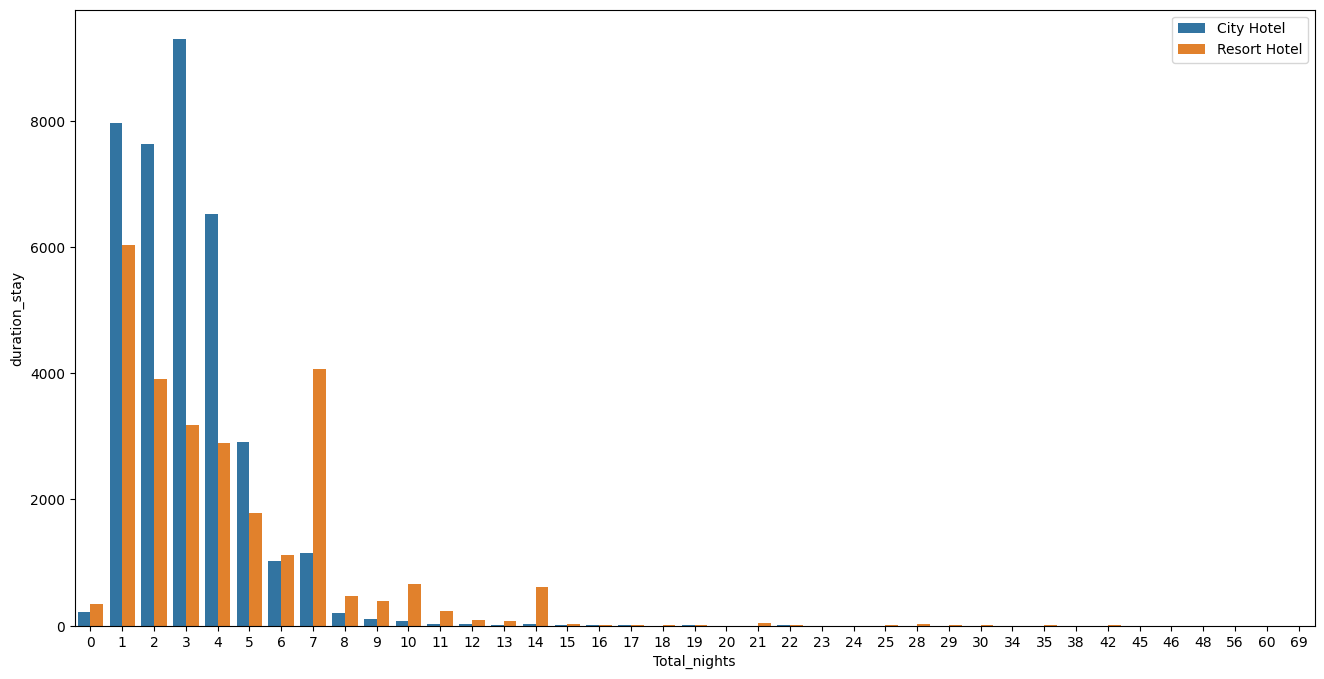

In [327]:
plt.figure(figsize = (16,8))
sns.barplot(x = 'Total_nights', y = 'duration_stay', hue = 'hotel', hue_order = ['City Hotel', 'Resort Hotel'],\
           data = duration )
plt.legend(loc ='upper right')

The above graph concludes that majority people were found to be staying for approximatly 5 days 

# most preferred meal: 

<AxesSubplot: xlabel='meal', ylabel='count'>

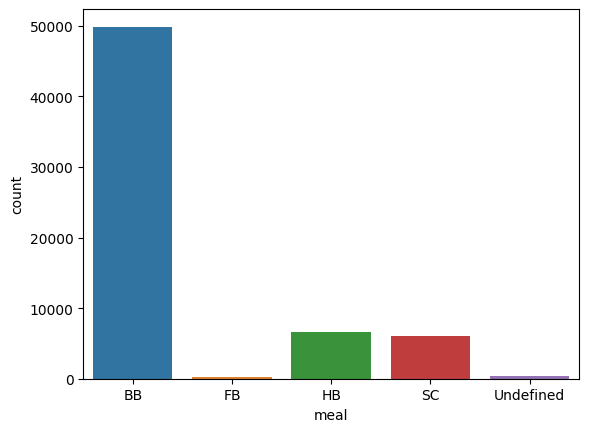

In [328]:
sns.countplot(x = 'meal', data = act_booking_df)

Most preferred meal was found to be BB (Bed and Breakfast)

# analysing cancellations: 

In [329]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [332]:
cancel_bk = hotel_df[hotel_df['is_canceled'] == 1]
cancel_bk.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015


In [344]:
# we try to get the total cancelled booking values from both city and resort hotels 

RH_total_canc = cancel_bk[cancel_bk['hotel']=='Resort Hotel']['is_canceled'].sum()
CH_total_canc = cancel_bk[cancel_bk['hotel'] == 'City Hotel']['is_canceled'].sum()
print(f'Total cancelled bookings of resort hotel :{RH_total_canc}')
print(f'Total cancelled bookings of city hotel :{CH_total_canc}')

Total cancelled bookings of resort hotel :11122
Total cancelled bookings of city hotel :33102


In [342]:
plt.figure(figsize = (12,8))
px.pie(values = [RH_total_canc,CH_total_canc], names = [RH_total_canc,CH_total_canc])

<Figure size 1200x800 with 0 Axes>

So, most of the cancellations were made in city hotel where most number of guests also chose to stay.
Now, let us gather more insight on the cancellations according to market segment

# which market segment has more cancellations done? 

In [357]:
mark_seg_cancel = cancel_bk.groupby(['market_segment','hotel'])['is_canceled'].sum().reset_index()
mark_seg_cancel.columns = ['market_segment','hotel','Total_cancellations']
mark_seg_cancel

,market_segment,hotel,Total_cancellations
0,Aviation,City Hotel,52
1,Complementary,City Hotel,64
2,Complementary,Resort Hotel,33
3,Corporate,City Hotel,641
4,Corporate,Resort Hotel,351
5,Direct,City Hotel,1056
6,Direct,Resort Hotel,878
7,Groups,City Hotel,9623
8,Groups,Resort Hotel,2474
9,Offline TA/TO,City Hotel,7173


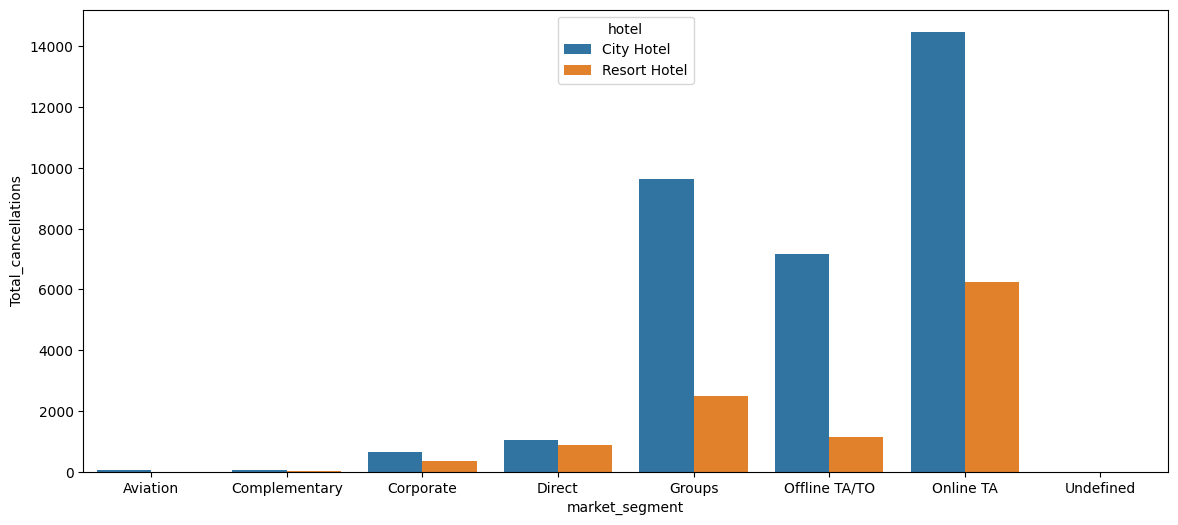

In [361]:
plt.figure(figsize = (14,6))
sns.barplot(data = mark_seg_cancel, x = 'market_segment',y = 'Total_cancellations',hue = 'hotel')
plt.show()

Most cancellations were made through online TA's followed by Groups and offline bookings. Also the cancellations made in resort hotel were significantly greater than those of city hotel 

# which months have highest number of cancellations? 

In [377]:
cancel_month_wise = cancel_bk.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancel_month_wise = cancel_month_wise.iloc[:,0:3]
cancel_month_wise.rename(columns = {'arrival_date_month':'month','is_canceled':'No. of cancellations'},inplace = True)
cancel_month_wise = sd.Sort_Dataframeby_Month(cancel_month_wise,'month')

In [378]:
cancel_month_wise

,month,hotel,No. of cancellations
0,January,City Hotel,1482
1,January,Resort Hotel,325
2,February,City Hotel,1901
3,February,Resort Hotel,795
4,March,City Hotel,2386
5,March,Resort Hotel,763
6,April,City Hotel,3465
7,April,Resort Hotel,1059
8,May,City Hotel,3653
9,May,Resort Hotel,1024


<AxesSubplot: xlabel='month', ylabel='No. of cancellations'>

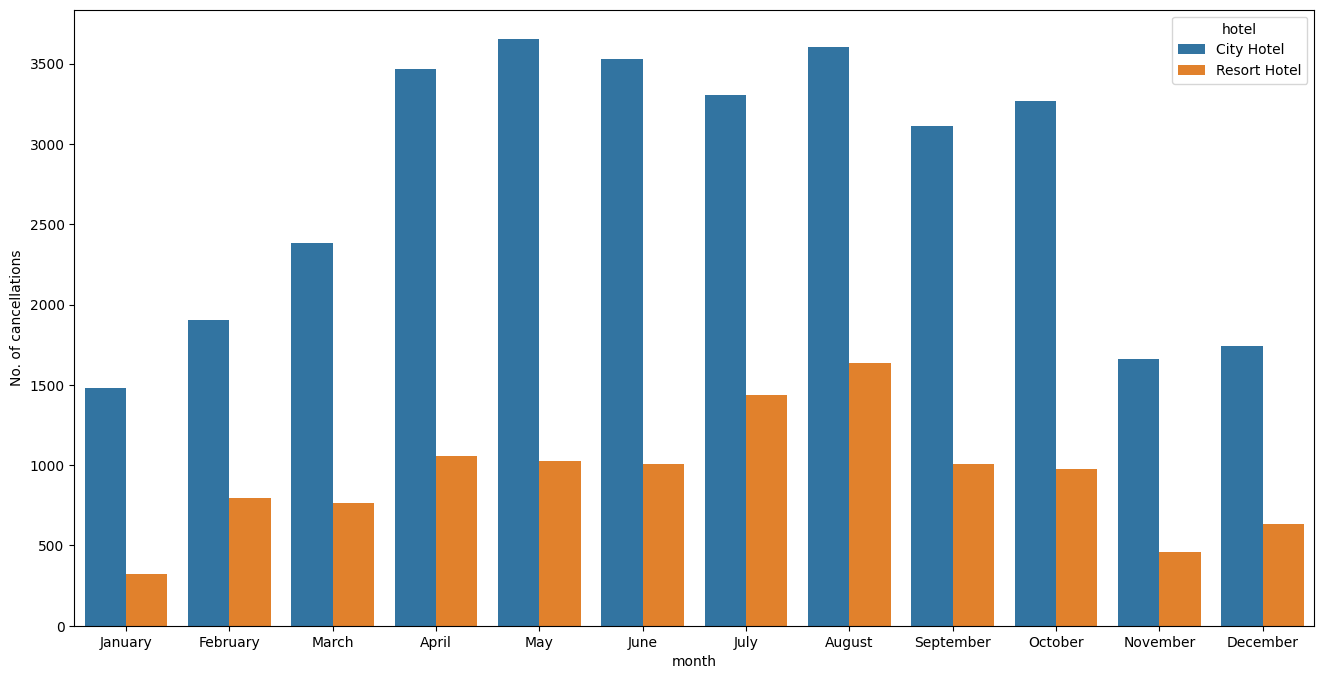

In [379]:
plt.figure(figsize = (16,8))
sns.barplot(x = 'month',y= 'No. of cancellations', hue = 'hotel', hue_order = ['City Hotel','Resort Hotel'], \
           data = cancel_month_wise)

Almost all the months from April till October(summer and autumn months) have a higher cancellation rate compared to remaining winter months. 